In [97]:
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

from IPython.display import display, HTML
import time

In [98]:
# Define a list of negative words
#Make a list of all the negative words to be used in your script

negative_words = ['sold out', 'bruised', 'mold', 'card reader', 'no show', 'card swiper', 'stole','dripping','construction','EBT','error','square','totil','totilpay','broken','shelf','tasted horrible','only','unaware','connect','clean','blocking','transaction','shut down','side door','flimsy','stuck','splitting','damaged','bent','scarred','door','running out','dollars','login']



In [99]:
## Read the Excel file ##
df_data=pd.read_excel('<file_name>.xlsx', sheet_name='<Sheet>')



In [100]:
# extract the column with issue descriptions
issue_column = df_data.loc[:, '<column_name>'].dropna()



In [101]:
# tokenize the issue descriptions and remove stop words
stop_words = set(stopwords.words('english'))
df_issues = pd.DataFrame(issue_column.apply(lambda x: nltk.word_tokenize(x)))
df_issues.columns = ['tokens']
df_issues['tokens'] = df_issues['tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])



In [109]:
# create a list of negative words from the tokens
negative_word_list = [word for tokens in df_issues['tokens'] for word in tokens if word in negative_words]

# create a frequency distribution of the negative words
negative_word_freq = nltk.FreqDist(negative_word_list)

# extract the top 15 most common negative words
top_negative_words = negative_word_freq.most_common(15)



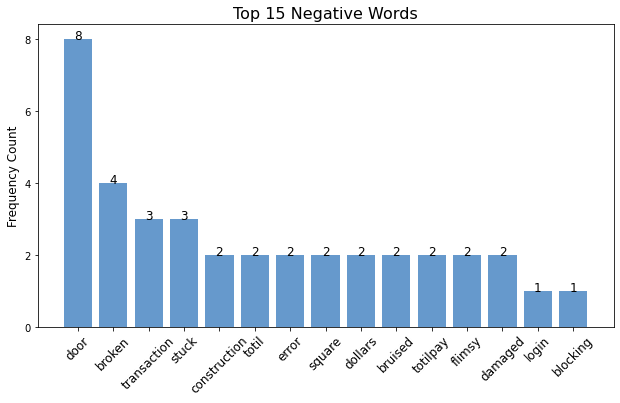

In [110]:
# create a bar chart of the top words
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(top_negative_words)), [val[1] for val in top_negative_words], align='center', color="#6699cc")
ax.set_xticks(range(len(top_negative_words)))
ax.set_xticklabels([val[0] for val in top_negative_words], rotation=45, fontsize=12)
ax.set_yticks(range(0, max([val[1] for val in top_negative_words])+1, 2))
ax.set_ylabel('Frequency Count', fontsize=12)
ax.set_title('Top 15 Negative Words', fontsize=16)

# add frequency counts on the bars
for i, v in enumerate([val[1] for val in top_negative_words]):
    ax.text(i, v, str(v), color='black', ha='center', fontsize=12)

plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9, wspace=0.2, hspace=0.5)
plt.show()